In [193]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

In [110]:
plt.rcParams.update({
    'figure.figsize': (8, 6),  # Размеры графиков
    'figure.dpi': 100,  # Разрешение графиков
    'savefig.dpi': 300,  # Разрешение сохраненных изображений
    'font.size': 12,  # Размер шрифта
    'font.family': 'serif',  # Семейство шрифтов
    'axes.labelsize': 14,  # Размер шрифта для подписей осей
    'axes.titlesize': 14,  # Размер шрифта для заголовков
    'xtick.labelsize': 12,  # Размер шрифта для подписей меток на оси X
    'ytick.labelsize': 12,  # Размер шрифта для подписей меток на оси Y
    'legend.fontsize': 10,  # Размер шрифта для легенды
    'lines.linewidth': 1,  # Толщина линий
    'lines.markersize': 6,  # Размер маркеров
    'axes.grid': False,  # Сетка на графиках
    'grid.alpha': 0.25,  # Прозрачность сетки
    'grid.linestyle': '--',  # Стиль линии сетки
    'grid.color': 'gray',  # Цвет сетки
    'axes.axisbelow': True,  # Сетка ниже данных
    'image.cmap': 'viridis',  # Цветовая карта для изображений
    'errorbar.capsize': 3,  # Размер "колпачков" на графиках ошибок
    "legend.loc": 'best', 
})

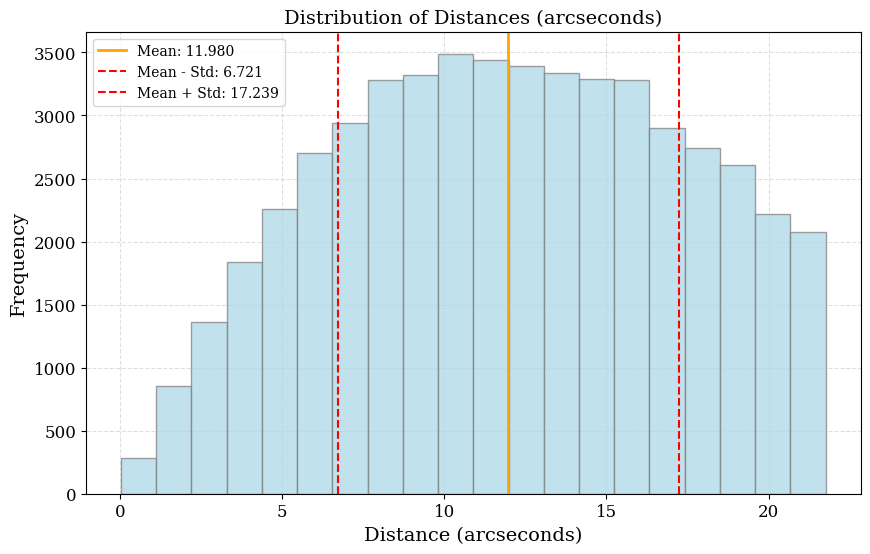

In [231]:
# Load the distances data from the uploaded txt file
file_path = 'distances.txt'  # Replace with the correct path to your file
with open(file_path, 'r') as file:
    distances = [float(line.strip()) for line in file.readlines()]

# Calculate basic statistics
min_distance = np.min(distances)
max_distance = np.max(distances)
mean_distance = np.mean(distances)
std_distance = np.std(distances)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=20, alpha=.75, color='lightblue', edgecolor='gray')
plt.title('Distribution of Distances (arcseconds)')
plt.xlabel('Distance (arcseconds)')
plt.ylabel('Frequency')
plt.grid(True)

# Add vertical lines for min, max, mean, and mean ± std
#plt.axvline(min_distance, color='green', linestyle='-.', linewidth=1.75, label=f'Min: {min_distance:.3f}')
#plt.axvline(max_distance, color='red', linestyle='-.', linewidth=1.75, label=f'Max: {max_distance:.3f}')
plt.axvline(mean_distance, color='orange', linestyle='solid', linewidth=2, label=f'Mean: {mean_distance:.3f}')
plt.axvline(mean_distance - std_distance, color='red', linestyle='--', linewidth=1.5, label=f'Mean - Std: {mean_distance - std_distance:.3f}')
plt.axvline(mean_distance + std_distance, color='red', linestyle='--', linewidth=1.5, label=f'Mean + Std: {mean_distance + std_distance:.3f}')



# Add legend
plt.legend()

# Save the histogram plot
plt.savefig("histogram_of_distances.png", dpi=300)
plt.show()


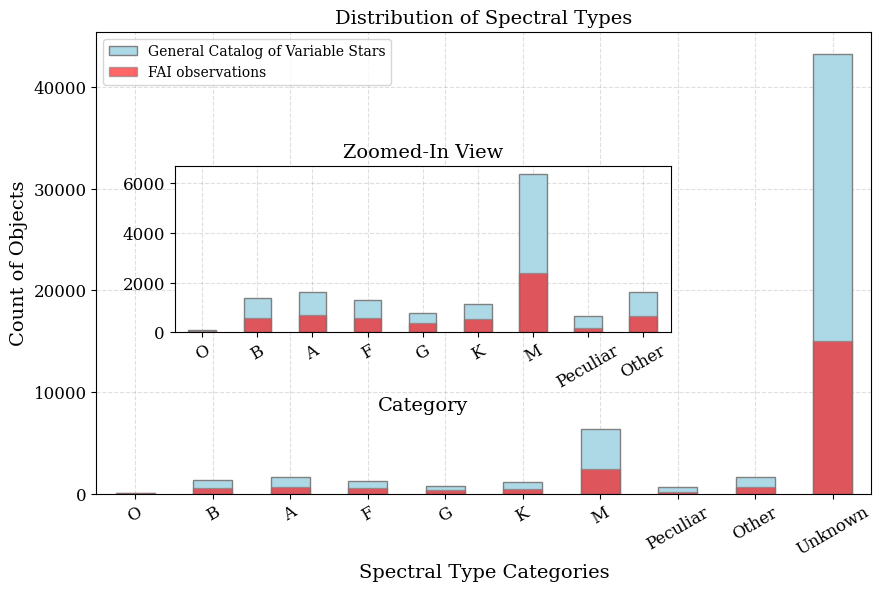

Histogram saved to: spectral_type_histogram_with_inset_overlay.png


In [223]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from astropy.io import fits

# Define function to categorize spectral types
def categorize_spectral_type(spectral_type):
    if spectral_type.startswith('  '):
        return "Unknown"
    elif spectral_type.startswith('O'):
        return "O"
    elif spectral_type.startswith('B'):
        return "B"
    elif spectral_type.startswith('A'):
        return "A"
    elif spectral_type.startswith('F'):
        return "F"
    elif spectral_type.startswith('G'):
        return "G"
    elif spectral_type.startswith('K'):
        return "K"
    elif spectral_type.startswith('M'):
        return "M"
    elif "pec" in spectral_type.lower():
        return "Peculiar"
    else:
        return "Other"

# Load the CSV file (from your dataset)
file_path = 'unique_names_spectral_types.csv'  # Update with the actual file path
data = pd.read_csv(file_path)

# Apply the categorization function to the 'SPECT_TYPE' column
data['Category'] = data['SPECT_TYPE'].apply(categorize_spectral_type)

# Group by the new 'Category' and count the occurrences
category_counts_csv = data.groupby('Category').size()

# Load the FITS catalog file
fits_data = fits.open("/Users/ildana/astro/fai/variable_search/catalogues/20240905_gsvs_catalogue.fits")
fits_df = pd.DataFrame(fits_data[1].data)

# Apply the same categorization function to the FITS catalog's 'SPECT_TYPE' column
fits_df['Category'] = fits_df['SPECT_TYPE'].apply(categorize_spectral_type)

# Group by the new 'Category' and count the occurrences in the FITS catalog
category_counts_fits = fits_df.groupby('Category').size()

# Sort categories in the desired order
desired_order = ["O", "B", "A", "F", "G", "K", "M", "Peculiar", "Other", "Unknown"]
category_counts_csv = category_counts_csv.reindex(desired_order, fill_value=0)
category_counts_fits = category_counts_fits.reindex(desired_order, fill_value=0)

# Create main plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot FITS catalog data in blue
category_counts_fits.plot(kind='bar', color='lightblue', edgecolor='gray', ax=ax, label='General Catalog of Variable Stars')

# Overlay CSV data on top in red
category_counts_csv.plot(kind='bar', color='red', edgecolor='gray', ax=ax, label='FAI observations', alpha=0.6)

# Set titles and labels for the main plot
ax.set_title('Distribution of Spectral Types')
ax.set_xlabel('Spectral Type Categories')
ax.set_ylabel('Count of Objects')
ax.grid(True)
ax.set_xticks(range(len(desired_order)))
ax.set_xticklabels(desired_order, rotation=30)
ax.legend()

# Create inset within the main plot focusing on selected categories
inset_ax = inset_axes(ax, width="40%", height="40%", bbox_to_anchor=(-0.85, -0.175, 1.6, 0.9), bbox_transform=ax.transAxes)

category_subset_csv = category_counts_csv[["O", "B", "A", "F", "G", "K", "M", "Peculiar", "Other"]]
category_subset_fits = category_counts_fits[["O", "B", "A", "F", "G", "K", "M", "Peculiar", "Other"]]

# Plot the subset of FITS data in the inset
category_subset_fits.plot(kind='bar', color='lightblue', edgecolor='gray', ax=inset_ax, label='General Catalog of Variable Stars')

# Overlay the subset of CSV data in red
category_subset_csv.plot(kind='bar', color='red', edgecolor='gray', ax=inset_ax, label='FAI observations', alpha=0.6)

# Customize the inset plot
inset_ax.set_title('Zoomed-In View')
inset_ax.set_xticks(range(len(category_subset_csv)))
inset_ax.set_xticklabels(category_subset_csv.index, rotation=30)
inset_ax.grid(True)

# Save the histogram plot with the inset
output_spectral_histogram_path = 'spectral_type_histogram_with_inset_overlay.png'
plt.savefig(output_spectral_histogram_path)
plt.show()

# Print the path of the saved histogram plot
print(f"Histogram saved to: {output_spectral_histogram_path}")


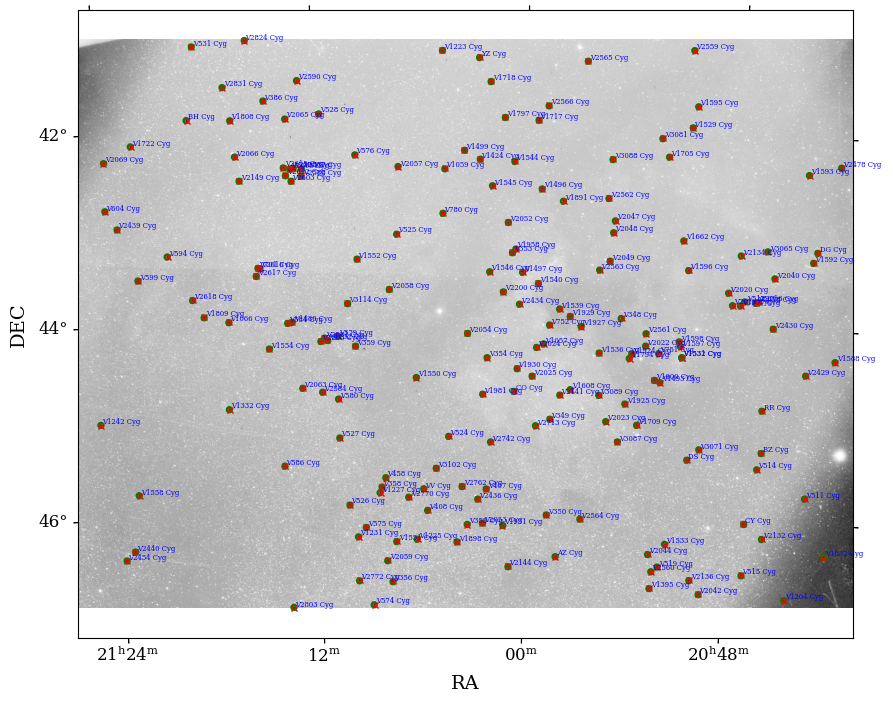

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u
from matplotlib.patches import Circle

# Функция для расчета углового расстояния между двумя объектами
def calculate_distance(ra1, dec1, ra2, dec2):
    coords1 = SkyCoord(ra=ra1 * u.deg, dec=dec1 * u.deg, frame='icrs')
    coords2 = SkyCoord(ra=ra2 * u.deg, dec=dec2 * u.deg, frame='icrs')
    return coords1.separation(coords2).arcsec

# Загрузка FITS изображения
fits_file = "alf-Cyg_11-12.11.1985_40m_70S-1.fit"  # Укажите путь к вашему FITS-файлу
hdu_list = fits.open(fits_file)
image_data = hdu_list[0].data
wcs = WCS(hdu_list[0].header)

# Загрузка данных объектов из CSV-файла
csv_file = "alf-Cyg_11-12.11.1985_40m_70S-1_objects.csv_varstar_matches_189.csv"  # Укажите путь к вашему CSV-файлу
df = pd.read_csv(csv_file)

# Настройка фигуры и осей для отображения FITS изображения
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': wcs})
ax.imshow(image_data, cmap='gray', origin='lower')

# Перебор всех объектов в CSV и нанесение их на изображение
for index, row in df.iterrows():
    # Координаты объектов на кадре (зелёные кружки)
    ra_frame = row['ra']  # RA из данных кадра
    dec_frame = row['dec']  # Dec из данных кадра
    frame_coord = SkyCoord(ra=ra_frame * u.deg, dec=dec_frame * u.deg, frame='icrs')
    pixel_frame = wcs.world_to_pixel(frame_coord)
    
    # Координаты объектов из каталога (красные крестики)
    ra_catalog = row['RA']  # RA из каталога
    dec_catalog = row['DEC']  # Dec из каталога
    catalog_coord = SkyCoord(ra=ra_catalog * u.deg, dec=dec_catalog * u.deg, frame='icrs')
    pixel_catalog = wcs.world_to_pixel(catalog_coord)
    
    # Нанесение объектов на изображение
    ax.add_patch(Circle((pixel_frame[0], pixel_frame[1]), radius=15, edgecolor='green', facecolor='none', lw=2))
    ax.plot(pixel_catalog[0], pixel_catalog[1], 'rx', markersize=5, label=f'{row["NAME"]}')  # Метка из каталога

    # Подпись расстояния между объектами
    dist = row['dist']  # Используем уже вычисленное расстояние
    ax.text(pixel_catalog[0] + 10, pixel_catalog[1] + 10, f'{row["NAME"]}', color='blue', fontsize=5)

    # Линия между объектами
    ax.plot([pixel_frame[0], pixel_catalog[0]], [pixel_frame[1], pixel_catalog[1]], color='blue', linestyle='--')

# Настройка отображения осей
ax.set_xlabel('RA')
ax.set_ylabel('DEC')

# Сохранение результата
plt.savefig("fits_image_with_matches.png",dpi=300)
plt.show()

# Закрытие FITS файла
hdu_list.close()


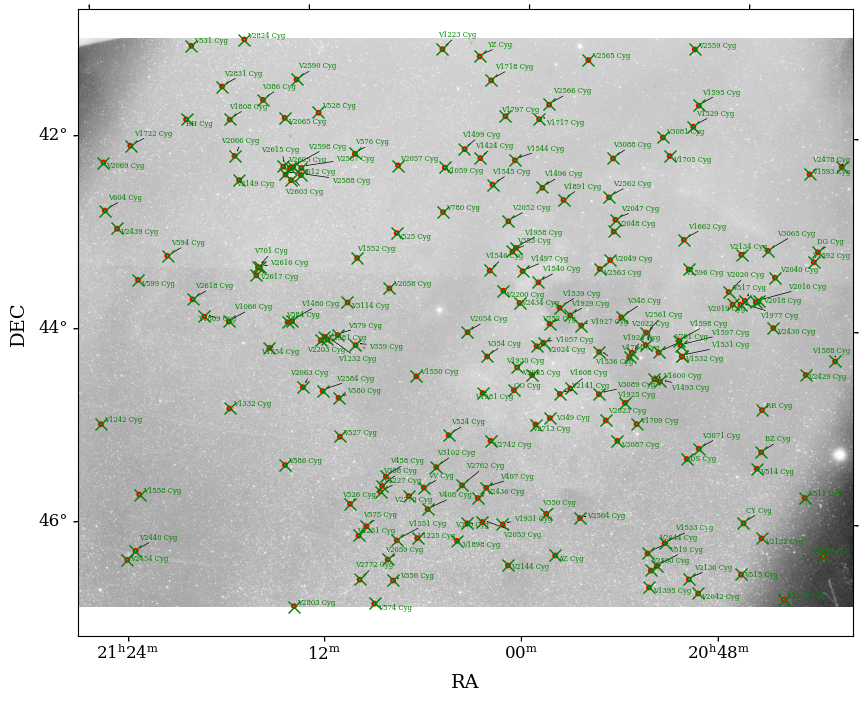

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u
from matplotlib.patches import Circle
from adjustText import adjust_text

# Функция для расчета углового расстояния между двумя объектами
def calculate_distance(ra1, dec1, ra2, dec2):
    coords1 = SkyCoord(ra=ra1 * u.deg, dec=dec1 * u.deg, frame='icrs')
    coords2 = SkyCoord(ra=ra2 * u.deg, dec=dec2 * u.deg, frame='icrs')
    return coords1.separation(coords2).arcsec

# Загрузка FITS изображения
fits_file = "alf-Cyg_11-12.11.1985_40m_70S-1.fit"  # Укажите путь к вашему FITS-файлу
hdu_list = fits.open(fits_file)
image_data = hdu_list[0].data
wcs = WCS(hdu_list[0].header)

# Загрузка данных объектов из CSV-файла
csv_file = "alf-Cyg_11-12.11.1985_40m_70S-1_objects.csv_varstar_matches_189.csv"  # Укажите путь к вашему CSV-файлу
df = pd.read_csv(csv_file)

# Настройка фигуры и осей для отображения FITS изображения
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': wcs})
ax.imshow(image_data, cmap='gray', origin='lower')

# Создание списка для подписей
texts = []

# Перебор всех объектов в CSV и нанесение их на изображение
for index, row in df.iterrows():
    # Координаты объектов на кадре (зелёные кружки)
    ra_frame = row['ra']  # RA из данных кадра
    dec_frame = row['dec']  # Dec из данных кадра
    frame_coord = SkyCoord(ra=ra_frame * u.deg, dec=dec_frame * u.deg, frame='icrs')
    pixel_frame = wcs.world_to_pixel(frame_coord)
    
    # Координаты объектов из каталога (красные крестики)
    ra_catalog = row['RA']  # RA из каталога
    dec_catalog = row['DEC']  # Dec из каталога
    catalog_coord = SkyCoord(ra=ra_catalog * u.deg, dec=dec_catalog * u.deg, frame='icrs')
    pixel_catalog = wcs.world_to_pixel(catalog_coord)
    
    # Нанесение объектов на изображение
    ax.add_patch(Circle((pixel_frame[0], pixel_frame[1]), radius=10, edgecolor='red', facecolor='none', lw=2))
    ax.plot(pixel_catalog[0], pixel_catalog[1], 'gx', markersize=8)  # Метка из каталога

    # Подпись расстояния между объектами
    dist = row['dist']  # Используем уже вычисленное расстояние
    text = ax.text(pixel_catalog[0] + 10, pixel_catalog[1] + 10, f'{row["NAME"]}', color='green', fontsize=5)
    texts.append(text)  # Добавляем текст в список для дальнейшей обработки

    # Линия между объектами
    ax.plot([pixel_frame[0], pixel_catalog[0]], [pixel_frame[1], pixel_catalog[1]], color='lightblue', linestyle='--')

# Настройка отображения осей
ax.set_xlabel('RA')
ax.set_ylabel('DEC')

# Автоматическая регулировка положения подписей, чтобы они не перекрывались
adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle="->", color='black', lw=0.5))

# Сохранение результата
plt.savefig("fits_image_with_adjusted_matches.png",dpi=600)
plt.show()

# Закрытие FITS файла
hdu_list.close()
